In [1]:
import sys, platform, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from matplotlib import cm
import scipy


from matplotlib import rc
import scipy
import matplotlib
from matplotlib import rc
from mpl_toolkits import mplot3d
from matplotlib import cm
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

## Read the data

In [2]:
data = pd.read_csv('data-optical-design (7).csv')
data.head()

,Horn,x,y,Amp,z,theta,phi,marker,Unnamed: 8,verificar intensidade pois mudei z
0,R1,-960,-388,50.465352,105.5400,9.37,26.3,n,NaN,NaN
1,R2,-960,0,50.628139,108.4500,9.00,0.0,n,NaN,1.0
2,R4,-840,-194,50.741191,103.9000,7.88,5.5,n,1.0,1.0
3,R9,-600,-194,51.040159,80.2923,6.12,16.3,s,2.0,1.0
4,R10,-600,194,51.040159,80.2923,6.12,-16.3,s,NaN,NaN


In [3]:
x     = data['x'].values.reshape(-1,1)
y     = data['y'].values.reshape(-1,1)
z     = data['z'].values.reshape(-1,1)
i     = data['Amp'].values.reshape(-1,1)
theta = data['theta'].values.reshape(-1,1)
phi   = data['phi'].values.reshape(-1,1)


THETA =  data['theta'].values.reshape(-1,1)
PHI = data['phi'].values.reshape(-1,1)

## Functions to read the data

In [4]:
pred_z_test = np.zeros([29,1])
pred_z_train = np.zeros([67,1])
pred_z_total = np.zeros([96,1])
pred_theta_test = np.zeros([29,1])
pred_theta_train = np.zeros([67,1])
pred_theta_total = np.zeros([96,1])
pred_phi_test = np.zeros([29,1])
pred_phi_train = np.zeros([67,1])
pred_phi_total = np.zeros([96,1])

for i in range (0,300):
    filename_pred_z_test = np.load('data_output/data_ypre_test_z'+str(i)+'.npy')
    filename_pred_z_train = np.load('data_output/data_ypre_train_z'+str(i)+'.npy')
    filename_pred_z_total = np.load('data_output/data_ypre_total_z'+str(i)+'.npy')
    filename_pred_theta_test =  np.load('data_output/data_ypre_test_theta'+str(i)+'.npy')
    filename_pred_theta_train = np.load('data_output/data_ypre_train_theta'+str(i)+'.npy')
    filename_pred_theta_total = np.load('data_output/data_ypre_total_theta'+str(i)+'.npy')
    filename_pred_phi_test = np.load('data_output/data_ypre_test_phi'+ str(i)+'.npy')
    filename_pred_phi_train = np.load('data_output/data_ypre_train_phi'+ str(i)+'.npy')
    filename_pred_phi_total = np.load('data_output/data_ypre_total_phi'+ str(i)+'.npy')
    
    pred_z_test = pred_z_test + filename_pred_z_test
    pred_z_train = pred_z_train + filename_pred_z_train
    pred_z_total = pred_z_total + filename_pred_z_total
    pred_theta_test = pred_theta_test + filename_pred_theta_test
    pred_theta_train = pred_theta_train + filename_pred_theta_train
    pred_theta_total = pred_theta_total + filename_pred_theta_total
    pred_phi_test = pred_phi_test + filename_pred_phi_test
    pred_phi_train = pred_phi_train + filename_pred_phi_train
    pred_phi_total = pred_phi_total + filename_pred_phi_total
    
    

## Calculate the mean absolute error


In [5]:
l_err_testz = []
l_err_trainz = []
l_err_totalz = []
l_err_testt = []
l_err_traint = []
l_err_totalt = []
l_err_testphi = []
l_err_trainphi = []
l_err_totalphi = []
filename_test_z_total = z
filename_test_theta_total = theta
filename_test_phi_total = phi

for i in range (0,300):
    # read the predictions
    filename_pred_z_test = np.load('data_output/data_ypre_test_z'+str(i)+'.npy')
    filename_pred_z_train = np.load('data_output/data_ypre_train_z'+str(i)+'.npy')
    filename_pred_z_total = np.load('data_output/data_ypre_total_z'+str(i)+'.npy')
    filename_pred_theta_test =  np.load('data_output/data_ypre_test_theta'+str(i)+'.npy')
    filename_pred_theta_train = np.load('data_output/data_ypre_train_theta'+str(i)+'.npy')
    filename_pred_theta_total = np.load('data_output/data_ypre_total_theta'+str(i)+'.npy')
    filename_pred_phi_test = np.load('data_output/data_ypre_test_phi'+ str(i)+'.npy')
    filename_pred_phi_train = np.load('data_output/data_ypre_train_phi'+ str(i)+'.npy')
    filename_pred_phi_total = np.load('data_output/data_ypre_total_phi'+ str(i)+'.npy')
    # read the test_data
    filename_test_z_test = np.load('data_output/data_ytest_z'+str(i)+'.npy')
    filename_test_z_train = np.load('data_output/data_ytrain_z'+str(i)+'.npy')
    filename_test_theta_test =  np.load('data_output/data_ytest_theta'+str(i)+'.npy')
    filename_test_theta_train = np.load('data_output/data_ytrain_theta'+ str(i)+'.npy')
    filename_test_phi_test = np.load('data_output/data_ytest_phi'+ str(i)+'.npy')
    filename_test_phi_train = np.load('data_output/data_ytrain_phi'+ str(i)+'.npy')
    
    # Add the mae to the lists
    l_err_testz.append(mean_absolute_error(filename_pred_z_test,filename_test_z_test)) 
    l_err_trainz.append(mean_absolute_error(filename_pred_z_train,filename_test_z_train))  
    l_err_totalz.append(mean_absolute_error(filename_pred_z_total,filename_test_z_total)) 
    l_err_testt.append(mean_absolute_error(filename_pred_theta_test,filename_test_theta_test)) 
    l_err_traint.append(mean_absolute_error(filename_pred_theta_train,filename_test_theta_train)) 
    l_err_totalt.append(mean_absolute_error(filename_pred_theta_total,filename_test_theta_total)) 
    l_err_testphi.append(mean_absolute_error(filename_pred_phi_test,filename_test_phi_test)) 
    l_err_trainphi.append(mean_absolute_error(filename_pred_phi_train,filename_test_phi_train)) 
    l_err_totalphi.append(mean_absolute_error(filename_pred_phi_total,filename_test_phi_total)) 
    
    

In [6]:
l_err_testz = np.asarray(l_err_testz).reshape(-1,1)
l_err_trainz = np.asarray(l_err_trainz).reshape(-1,1)
l_err_totalz = np.asarray(l_err_totalz).reshape(-1,1)
l_err_testt = np.asarray(l_err_testt).reshape(-1,1)
l_err_traint = np.asarray(l_err_traint).reshape(-1,1)
l_err_totalt = np.asarray(l_err_totalt).reshape(-1,1)
l_err_testphi = np.asarray(l_err_testphi).reshape(-1,1)
l_err_trainphi = np.asarray(l_err_trainphi).reshape(-1,1)
l_err_totalphi = np.asarray(l_err_totalphi).reshape(-1,1)

In [7]:
print(" Média dos Erros absolutos médios para z,theta,phi\n")
print('z teste:',l_err_testz.mean(),'\n z treino: ',l_err_trainz.mean(),'\n z total: ',l_err_totalz.mean(),
      '\n theta teste: ',l_err_testt.mean(),'\n theta treino',l_err_traint.mean(), '\n theta_total: ', l_err_totalt.mean(),
      '\n phi teste:',l_err_testphi.mean(),'\n phi treino: ',l_err_trainphi.mean(),'\n phi total:', l_err_totalphi.mean())

 Média dos Erros absolutos médios para z,theta,phi

z teste: 12.270745672312865 
 z treino:  7.962506265550658 
 z total:  9.263953584621497 
 theta teste:  0.32805578579690264 
 theta treino 0.15887551245025142 
 theta_total:  0.21003971834085466 
 phi teste: 17.625611103327177 
 phi treino:  4.557490682744526 
 phi total: 8.505152063106904


## Median of realization

In [8]:
pred_z_total = pred_z_total/300
pred_theta_total = pred_theta_total/300
pred_phi_total = pred_phi_total/300

## Some variables change to make task easy
    Here will change some of my variable name

In [9]:
XY = scipy.array([x,y])

Zfit = pred_z_total 
THETAfit = pred_theta_total 
PHIfit = pred_phi_total

/home/rafael/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """Entry point for launching an IPython kernel.


## Plots

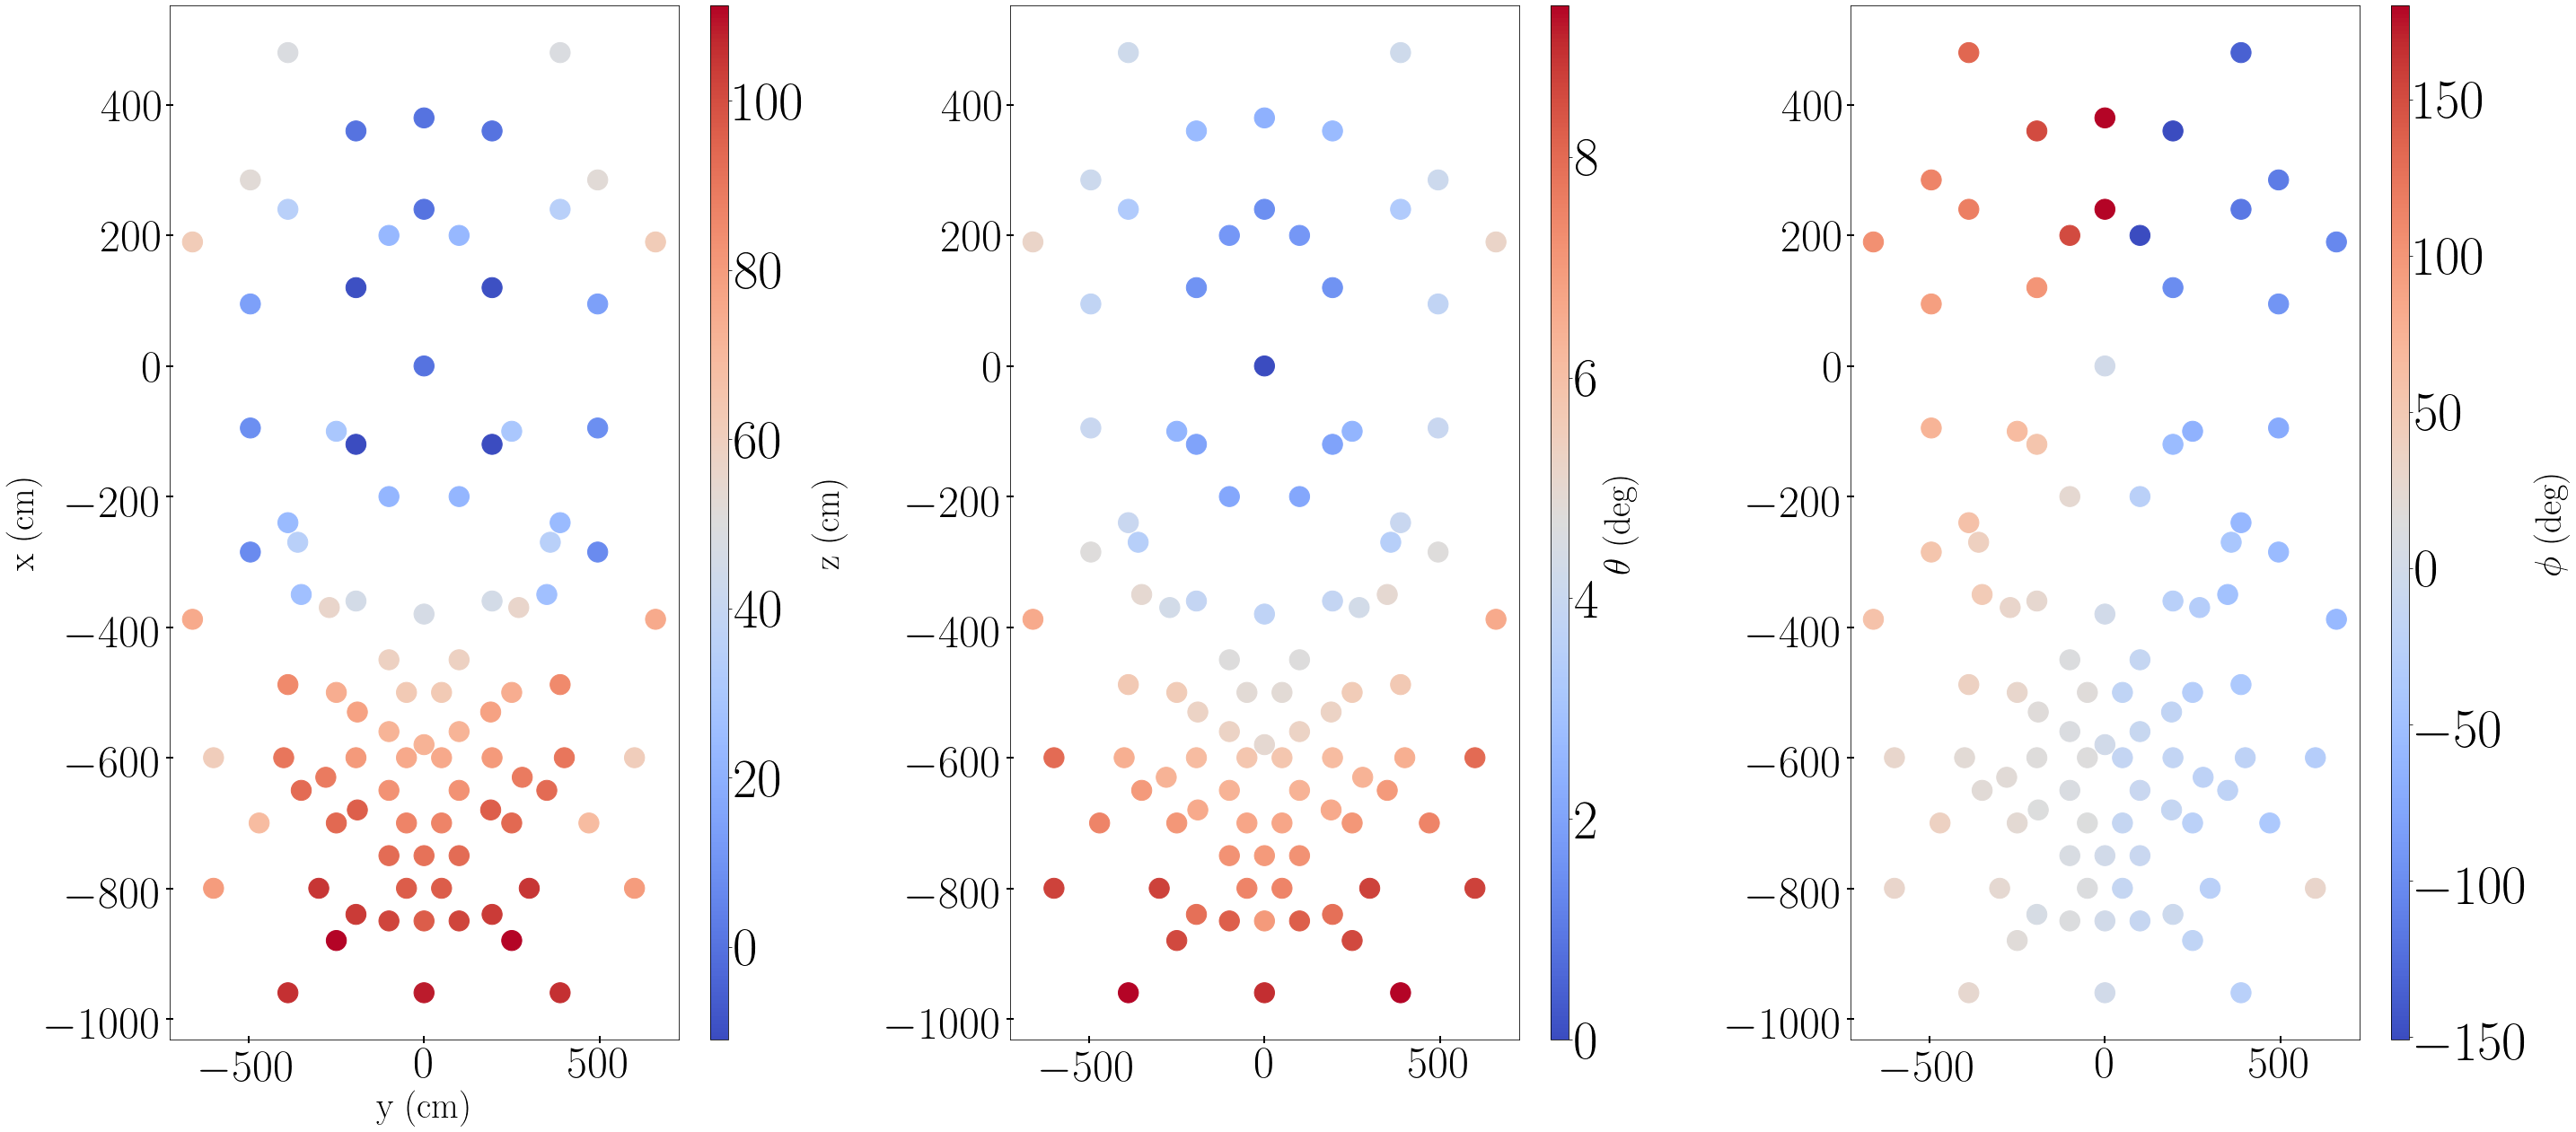

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=.32)
fig.subplots_adjust(bottom=0.0, left=0.025, top = 4, right=6.)


fsize_x = 40
fsize_y = 40
fsize_z = 40
fsize_ticks  = 60
fsize_ticks1 = 50
fsize_ticks2 = 60
ax = fig.add_subplot(131)
im = ax.scatter(y, x, c=z, s=500, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=40,
               grid_color='r', grid_alpha=0)

cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=fsize_ticks)
cbar.set_label('z (cm)',    size=fsize_z)
ax.set_xlabel("y (cm)", fontsize=fsize_x)
ax.set_ylabel("x (cm)", fontsize=fsize_y)
ax.tick_params( labelsize=fsize_ticks1)
cbar.ax.tick_params( axis="both",  labelsize=fsize_ticks2)

ax = fig.add_subplot(132)
im = ax.scatter(y, x, c=theta, s=500, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=40,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=fsize_ticks)
cbar.set_label(r'$\theta$ (deg)', size=fsize_z)
#ax.set_ylabel("x (cm)",       fontsize=fsize_y)
#ax.set_xlabel("y (cm)",       fontsize=fsize_x)
ax.tick_params( labelsize=fsize_ticks1)
cbar.ax.tick_params( axis="both",  labelsize=fsize_ticks2)

ax = fig.add_subplot(133)
im = ax.scatter(y, x, c=phi, s=500, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=40,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=fsize_ticks)
cbar.set_label(r'$\phi$ (deg)', size=fsize_z)
#ax.set_ylabel("x (cm)",     fontsize=fsize_y)
#ax.set_xlabel("y (cm)",     fontsize=fsize_x)
ax.tick_params( labelsize=fsize_ticks1)
cbar.ax.tick_params( axis="both",  labelsize=fsize_ticks2)

plt.savefig("graphics/calibrated.jpg", dpi=300, bbox_inches='tight');

In [11]:
Z                      = scipy.array(z)


/home/rafael/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """Entry point for launching an IPython kernel.


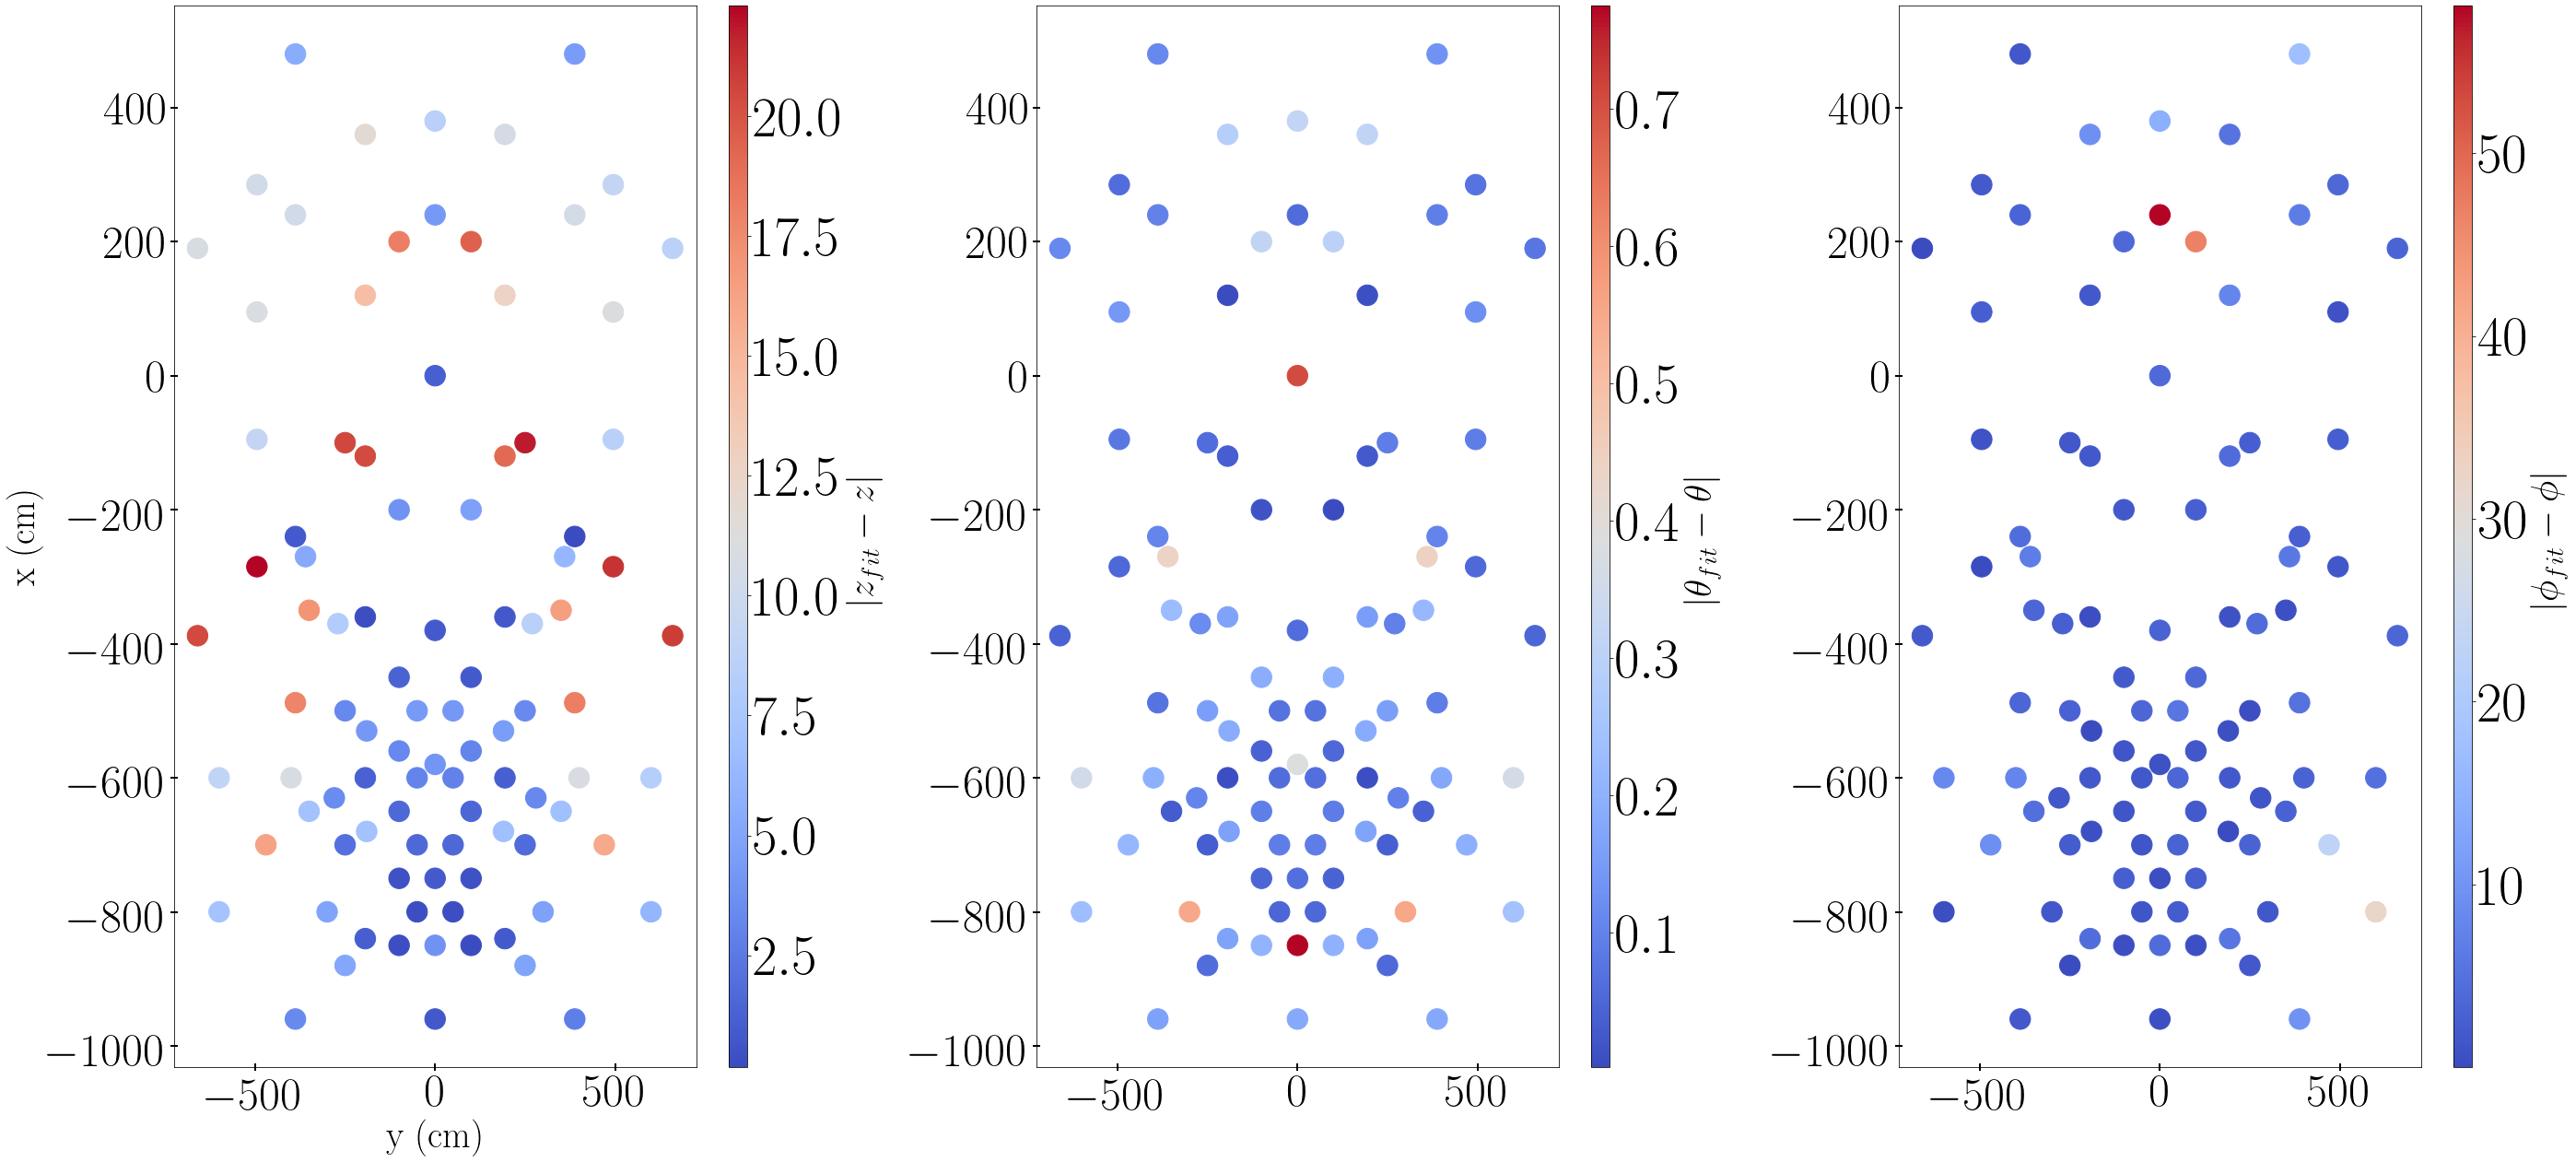

In [12]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=.32)
fig.subplots_adjust(bottom=0.0, left=0.025, top = 4, right=6.)


fsize_x = 40
fsize_y = 40
fsize_z = 40
fsize_ticks  = 60
fsize_ticks1 = 50
fsize_ticks2 = 60

ax = fig.add_subplot(131)
im = ax.scatter(y, x, c=np.abs(Zfit-z), s=500, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=40, grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=fsize_ticks)
cbar.set_label(r'$|z_{fit}-z|$', fontsize=fsize_z)
ax.set_ylabel("x (cm)",       fontsize=fsize_y)
ax.set_xlabel("y (cm)",       fontsize=fsize_x)
ax.tick_params( labelsize=fsize_ticks1)
cbar.ax.tick_params( axis="both",  labelsize=fsize_ticks2)


ax = fig.add_subplot(132)
im = ax.scatter(y, x, c=np.abs(THETAfit-theta), s=500, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=40,  grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=fsize_ticks)
cbar.set_label(r'$|\theta_{fit} - \theta|$', fontsize=fsize_z)
#ax.set_ylabel("x (cm)",       fontsize=fsize_y)
#ax.set_xlabel("y (cm)",       fontsize=fsize_x)
ax.tick_params( labelsize=fsize_ticks1)
cbar.ax.tick_params( axis="both",  labelsize=fsize_ticks2)


ax = fig.add_subplot(133)
im = ax.scatter(y, x, c=np.abs(PHIfit-phi), s=500, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=40,grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=fsize_ticks)
cbar.set_label(r'$|\phi_{fit} - \phi|$', size=fsize_z)
#ax.set_ylabel("x (cm)",       fontsize=fsize_y)
#ax.set_xlabel("y (cm)",       fontsize=fsize_x)
ax.tick_params( labelsize=fsize_ticks1)
cbar.ax.tick_params( axis="both",  labelsize=fsize_ticks2)

plt.savefig('graphics/2d_fit_diff_abs.png',dpi=300, bbox_inches='tight')

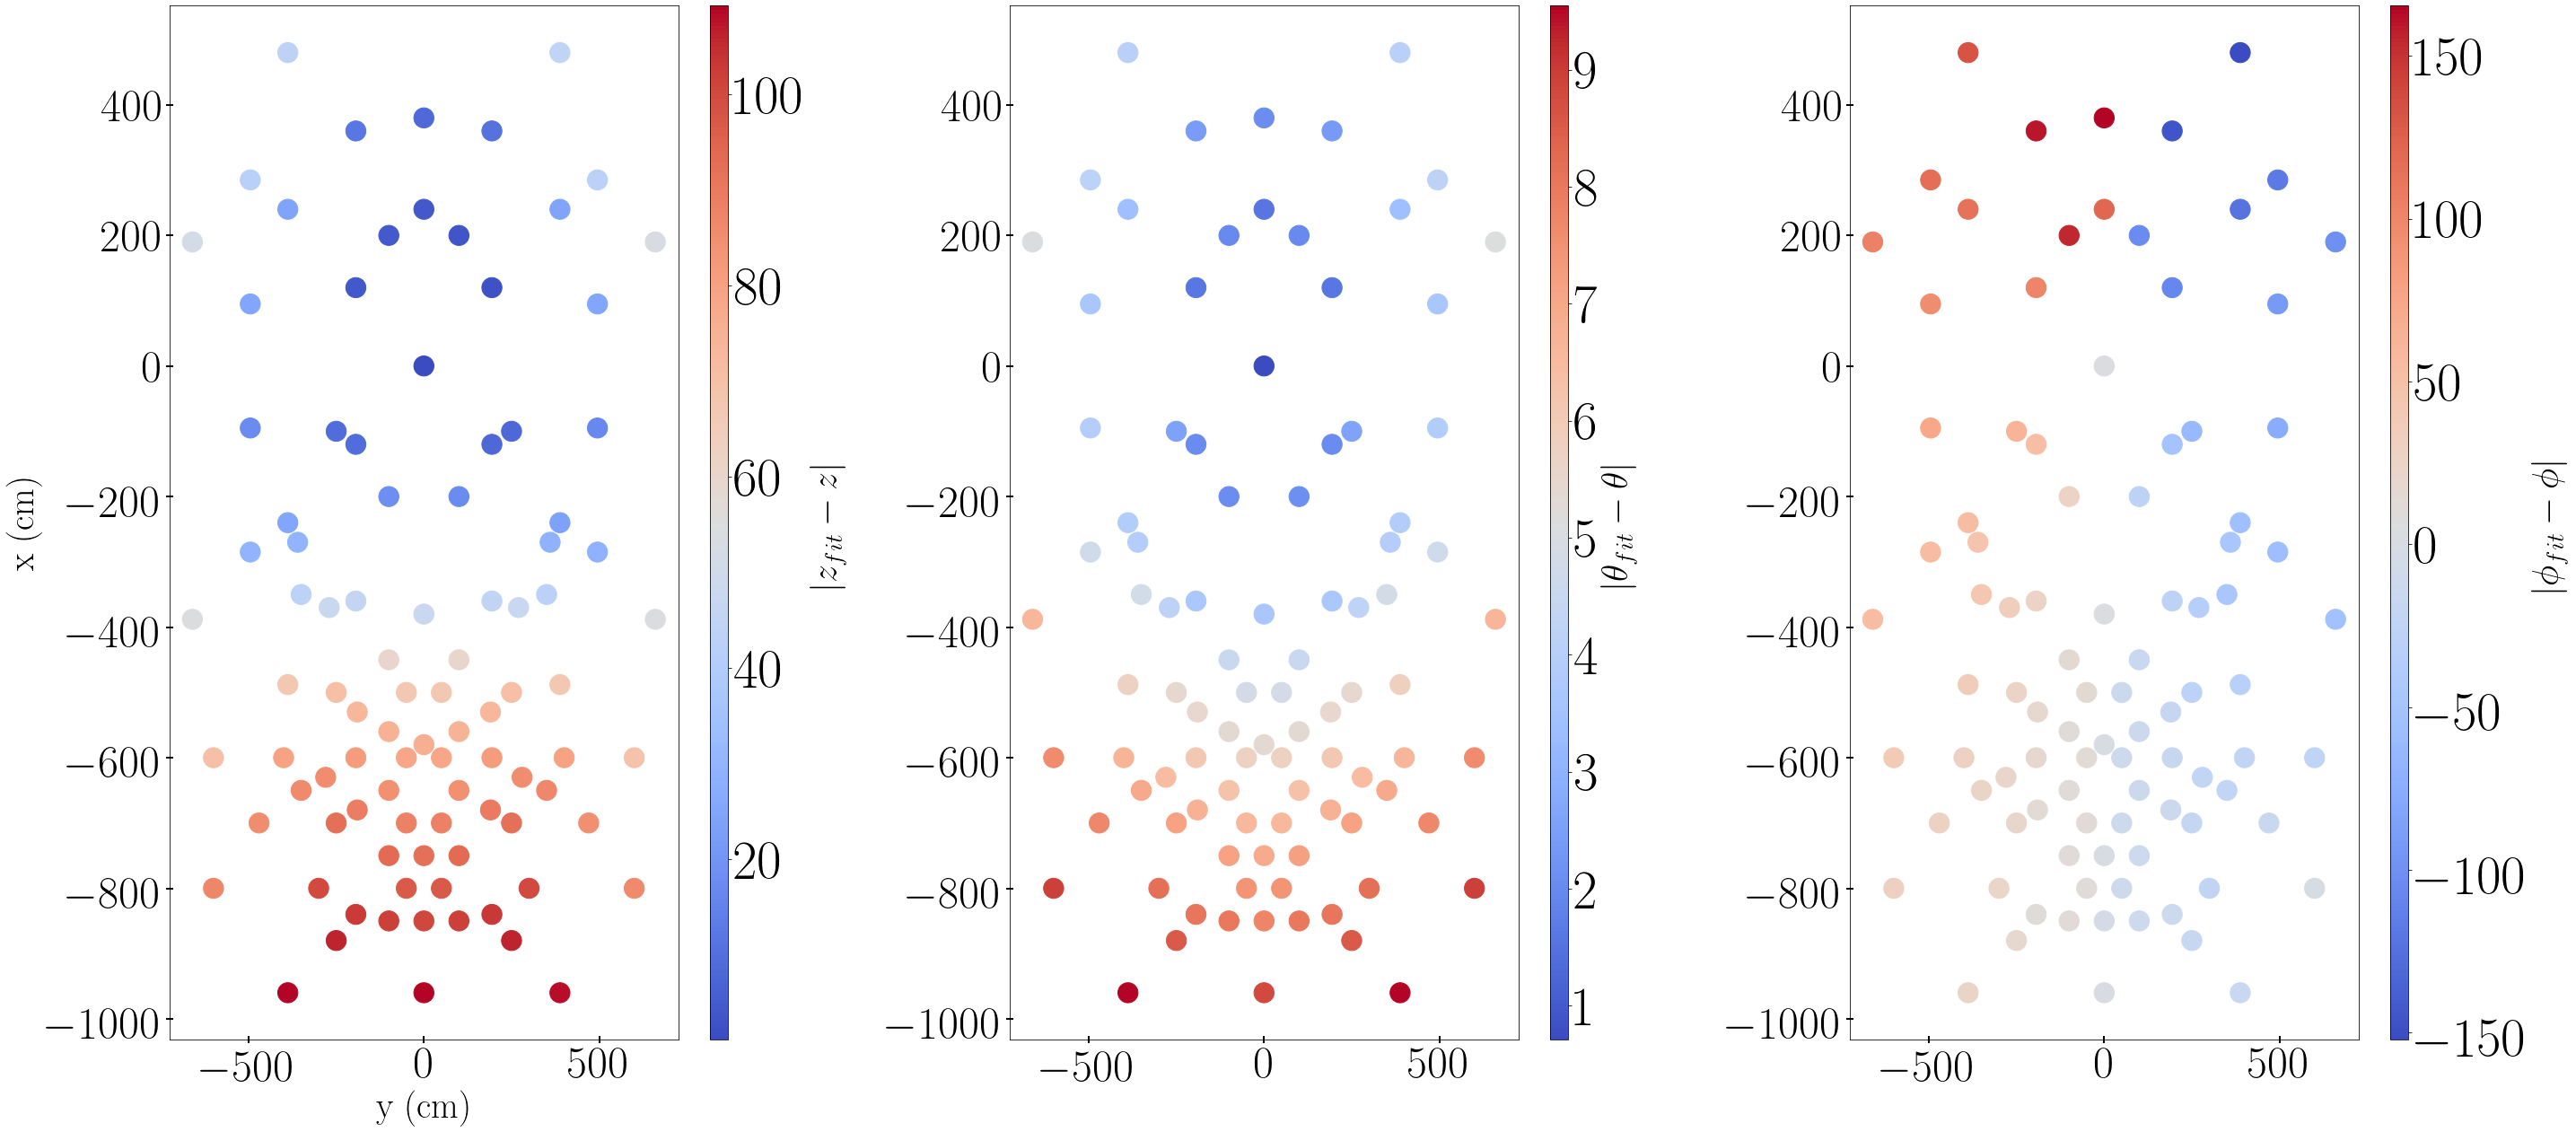

In [13]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=.32)
fig.subplots_adjust(bottom=0.0, left=0.025, top = 4, right=6.)


fsize_x = 40
fsize_y = 40
fsize_z = 40
fsize_ticks  = 60
fsize_ticks1 = 50
fsize_ticks2 = 60

ax = fig.add_subplot(131)
im = ax.scatter(y, x, c=Zfit, s=500, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=40,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=fsize_ticks)
cbar.set_label(r'$|z_{fit}-z|$', fontsize=fsize_z)
ax.set_ylabel("x (cm)",       fontsize=fsize_y)
ax.set_xlabel("y (cm)",       fontsize=fsize_x)
ax.tick_params( labelsize=fsize_ticks1)
cbar.ax.tick_params( axis="both",  labelsize=fsize_ticks2)

ax = fig.add_subplot(132)
im = ax.scatter(y, x, c=THETAfit, s=500, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=40,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=fsize_ticks)
cbar.set_label(r'$|\theta_{fit} - \theta|$', fontsize=fsize_z)
#ax.set_ylabel("x (cm)",       fontsize=fsize_y)
#ax.set_xlabel("y (cm)",       fontsize=fsize_x)
ax.tick_params( labelsize=fsize_ticks1)
cbar.ax.tick_params( axis="both",  labelsize=fsize_ticks2)

ax = fig.add_subplot(133)
index = np.where(y>0)
#PHIfit[index]=-PHIfit[index]
#phi[index]   =-phi[index]
im = ax.scatter(y, x, c=PHIfit, s=500, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=40,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=fsize_ticks)
cbar.set_label(r'$|\phi_{fit} - \phi|$', size=fsize_z)
#ax.set_ylabel("x (cm)",       fontsize=fsize_y)
#ax.set_xlabel("y (cm)",       fontsize=fsize_x)
ax.tick_params( labelsize=fsize_ticks1)
cbar.ax.tick_params( axis="both",  labelsize=fsize_ticks2)

plt.savefig("graphics/diff_horns.jpg", dpi=300, bbox_inches='tight');

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


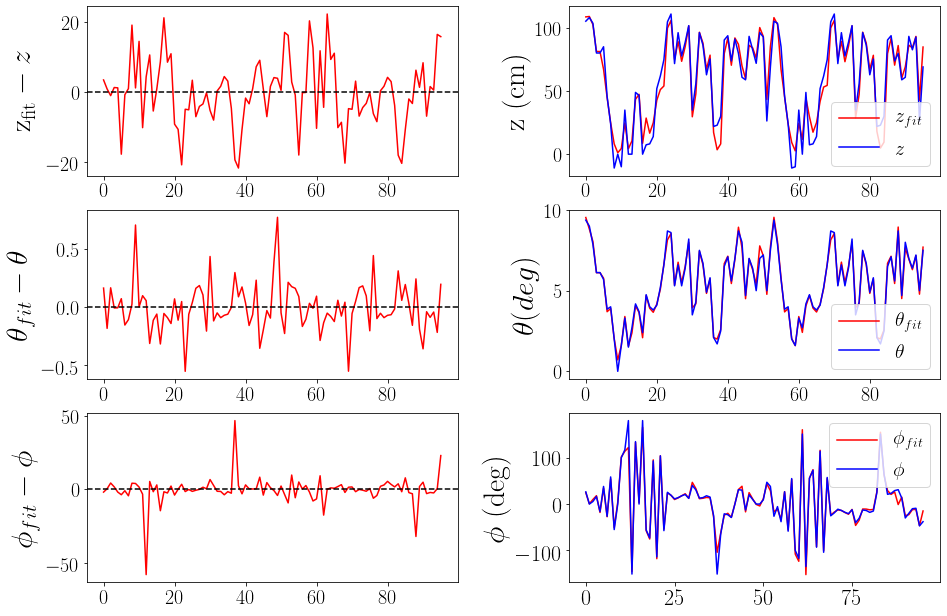

In [14]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=.3)
fig.subplots_adjust(bottom=0.0, left=0.025, top = 2, right=2.)

#--------------------
#PHI[index]   =-PHI[index]

ax1 = fig.add_subplot(321)
#ax.set_title("Residual")
plt.plot(range(len(Zfit-z)),Zfit-z,color="red")
plt.axhline(y=0,c="black",ls="dashed")
ax1.tick_params(labelsize=20)
#ax.set_xlabel("Number of measure",fontsize=25)
ax1.set_ylabel(r"z$_{\rm{fit}}-z$",fontsize=30)
#plt.legend(loc="best",fontsize=20)

ax2 = fig.add_subplot(322)
#ax.set_title("Real Value x Reconstructed Value")
plt.plot(Zfit,label=r"$z_{fit}$", color="red")
plt.plot(z,label=r"$z$", color="blue")
#ax.set_xlabel("Number of measure",fontsize=25)
ax2.set_ylabel("z (cm)",fontsize=30)
ax2.tick_params(labelsize=20)
plt.legend(loc="best",fontsize=20)

#--------------------

ax3 = fig.add_subplot(323)
plt.plot(range(len(THETAfit-THETA)),THETAfit-THETA,color="red")
plt.axhline(y=0,c="black",ls="dashed")
ax3.tick_params(labelsize=20)
#ax.set_xlabel("Number of measure",fontsize=25)
ax3.set_ylabel(r"$\theta_{fit}-\theta$",fontsize=30)
#plt.legend(loc="best",fontsize=20)

ax4 = fig.add_subplot(324)
plt.plot(THETAfit,label=r"$\theta_{fit}$", color="red")
plt.plot(THETA,label=r"$\theta$ ", color="blue")
#ax.set_xlabel("Number of measure",fontsize=25)
ax4.set_ylabel(r"$\theta (deg)$",fontsize=30)
ax4.tick_params(labelsize=20)
plt.legend(loc="best",fontsize=20)

#--------------------

ax5 = fig.add_subplot(325)
plt.plot(range(len(PHIfit-PHI)),PHIfit-PHI, color="red")
plt.axhline(y=0,c="black",ls="dashed")
#ax.set_xlabel("Number of measure",fontsize=25)
ax5.set_ylabel(r"$\phi_{fit}-\phi$",fontsize=30)
ax5.tick_params(labelsize=20)
#plt.legend(loc="best",fontsize=20)

ax6 = fig.add_subplot(326)
index = np.where(y>0)
plt.plot(PHIfit,label=r"$\phi_{fit}$", color="red")
plt.plot(PHI   ,label=r"$\phi$", color="blue")
#ax.set_xlabel("Number of measure",fontsize=25)
ax6.set_ylabel(r"$\phi$ (deg)",fontsize=30)
ax.tick_params(labelsize=20)
plt.legend(loc="best",fontsize=20)

plt.savefig("graphics/comparation_horns.jpg", dpi=300, bbox_inches='tight');

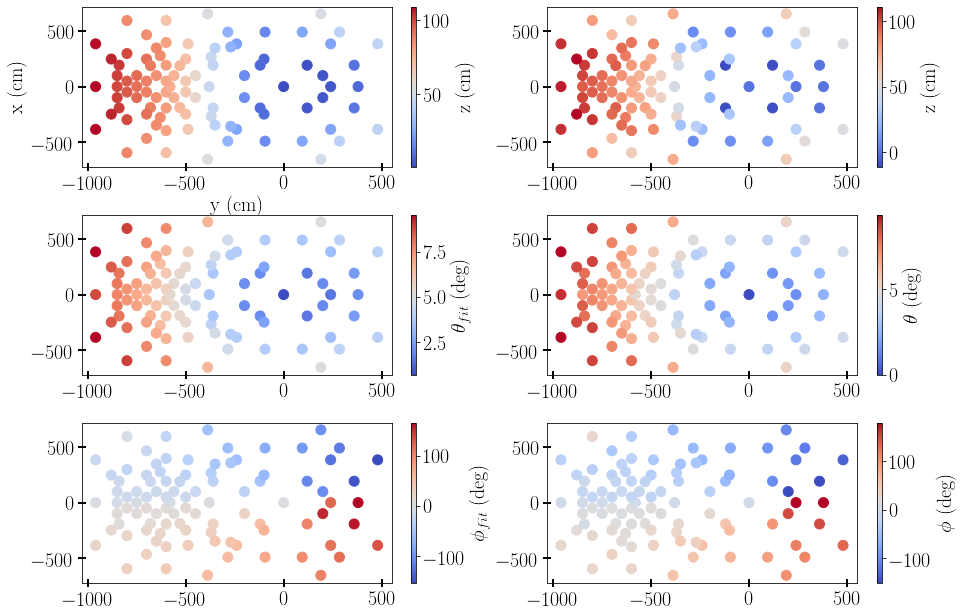

In [15]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=.2)
fig.subplots_adjust(bottom=0.0, left=0.025, top = 2, right=2.)

#-----------------------------

ax = fig.add_subplot(321)
im = ax.scatter(XY[0], XY[1], c=Zfit, s=100, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=20,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=30)
cbar.set_label('z (cm)', size=20)
ax.set_ylabel("x (cm)", fontsize=20)
ax.set_xlabel("y (cm)",fontsize=20)
cbar.ax.tick_params(labelsize=20)

ax = fig.add_subplot(322)
im = ax.scatter(x, y, c=Z, s=100, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=20,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=30)
cbar.set_label('z (cm)', size=20)
#ax.set_ylabel("x (cm)", fontsize=20)
#ax.set_xlabel("y (cm)",fontsize=20)
cbar.ax.tick_params(labelsize=20)

#-----------------------------

ax = fig.add_subplot(323)
im = ax.scatter(XY[0], XY[1], c=THETAfit, s=100, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=20,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=30)
cbar.set_label(r'$\theta_{fit}$ (deg)', size=20)
#ax.set_ylabel("x (cm)", fontsize=20)
#ax.set_xlabel("y (cm)",fontsize=20)
cbar.ax.tick_params(labelsize=20)

ax = fig.add_subplot(324)
im = ax.scatter(x, y, c=THETA, s=100, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=20,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=30)
cbar.set_label(r'$\theta$ (deg)', size=20)
#ax.set_ylabel("x (cm)", fontsize=20)
#ax.set_xlabel("y (cm)",fontsize=20)
cbar.ax.tick_params(labelsize=20)

#-----------------------------

ax = fig.add_subplot(325)
im = ax.scatter(XY[0], XY[1], c=PHIfit, s=100, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=20,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=30)
cbar.set_label(r'$\phi_{fit}$ (deg)', size=20)
#ax.set_ylabel("x (cm)", fontsize=20)
#ax.set_xlabel("y (cm)",fontsize=20)
cbar.ax.tick_params(labelsize=20)

ax = fig.add_subplot(326)
im = ax.scatter(x, y, c=PHI, s=100, cmap=cm.coolwarm)
ax.tick_params(axis="both",direction='inout',length=8,width=2, colors='black', labelsize=20,
               grid_color='r', grid_alpha=0)
cbar = fig.colorbar(im, ax=ax,shrink=1,aspect=30)
cbar.set_label(r'$\phi$ (deg)', size=20)
#ax.set_ylabel("x (cm)", fontsize=20)
#ax.set_xlabel("y (cm)",fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.savefig("graphics/other_comparation_horns.jpg", dpi=300, bbox_inches='tight');